#  Инициализация весов нейронных сетей. Способы регуляризации нейронных сетей. Продвинутые алгоритмы градиентного спуска.

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/nn.init.html
* https://adityassrana.github.io/blog/theory/2020/08/26/Weight-Init.html
* https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/
* https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/
* https://pytorch.org/docs/stable/optim.html
* https://seaborn.pydata.org/examples/errorband_lineplots.html

## Задачи для совместного разбора

1\. Инициализируйте веса полносвязного слоя единицами, а смещения - нулями.

In [1]:
import torch as th
import torch.nn as nn

In [2]:
fc = nn.Linear(in_features=5, out_features=3)

In [3]:
fc.weight

Parameter containing:
tensor([[ 0.0861, -0.1136, -0.2968, -0.1098, -0.1403],
        [-0.3098, -0.0362, -0.0319,  0.0192, -0.3965],
        [-0.1576,  0.3799,  0.2954, -0.2132,  0.0680]], requires_grad=True)

In [4]:
nn.init.ones_(fc.weight)

Parameter containing:
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], requires_grad=True)

In [5]:
fc.weight

Parameter containing:
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], requires_grad=True)

2\. Изучите, как работает слой `nn.Dropout` в режиме обучения модели и в режиме использования модели.

In [6]:
model = nn.Sequential(
    # ...
    nn.Dropout(p=0.5)
)

In [7]:
X = th.randn(1, 5)
X

tensor([[ 0.1486, -1.0042,  1.2457, -0.5225,  1.7110]])

In [8]:
model(X) # scale: 1/(1-p)

tensor([[ 0.0000, -0.0000,  0.0000, -1.0451,  3.4221]])

In [9]:
model.eval()

Sequential(
  (0): Dropout(p=0.5, inplace=False)
)

In [16]:
model(X)

tensor([[ 0.1486, -1.0042,  1.2457, -0.5225,  1.7110]])

In [17]:
model.train()

Sequential(
  (0): Dropout(p=0.5, inplace=False)
)

3\. Изучите, как работает слой `nn.BatchNorm1d` в режиме обучения модели и в режиме использования модели.

In [18]:
X = th.randn(100, 5)
X

tensor([[ 6.8630e-01,  1.3913e+00,  3.6501e-01, -1.2512e+00,  7.4402e-01],
        [-2.9406e-01, -1.8383e-01,  9.0651e-01,  1.1276e+00, -2.9015e-01],
        [-8.4976e-01, -1.0818e+00,  7.5713e-01,  4.6313e-01, -1.0552e+00],
        [ 9.6753e-01,  5.5446e-01,  2.5958e-01, -6.2688e-01,  2.1897e-01],
        [ 3.0984e-01, -3.4287e-01,  7.4712e-01,  1.1138e+00,  2.2072e-01],
        [ 4.4325e-01, -9.3360e-02, -5.4142e-02, -1.5113e+00,  5.5462e-01],
        [ 1.2792e-01, -4.0500e-01, -3.4423e-03,  1.4336e+00,  6.6274e-02],
        [-7.1750e-01, -3.3163e-01,  9.6545e-02, -1.0456e-01,  7.2724e-01],
        [-3.2426e-01,  1.5985e+00,  8.0980e-01, -6.5307e-02, -1.3526e+00],
        [ 1.0347e+00, -1.2221e+00, -1.6782e+00,  4.1119e-01,  1.9804e-01],
        [ 2.0687e+00,  1.0300e+00,  5.6969e-01, -2.3350e+00,  1.0926e-01],
        [ 1.8226e-01,  1.2847e+00,  2.2118e+00, -7.9337e-01, -1.0317e+00],
        [ 2.1840e+00,  3.8336e-01, -1.4244e+00,  5.3706e-01,  2.6284e-01],
        [ 8.2986e-01,  7.

In [20]:
X.mean(dim=0), X.std(dim=0), X.var(dim=0)

(tensor([ 0.0935,  0.0615,  0.0725, -0.0487,  0.1631]),
 tensor([0.9400, 1.0482, 0.9336, 1.0616, 0.9246]),
 tensor([0.8836, 1.0986, 0.8715, 1.1270, 0.8548]))

In [21]:
bn = nn.BatchNorm1d(num_features=5)
y = bn(X)

In [22]:
y.mean(dim=0), y.std(dim=0), y.var(dim=0)

(tensor([-2.0266e-08,  1.9073e-08, -9.5367e-09,  4.7684e-09,  1.3113e-08],
        grad_fn=<MeanBackward1>),
 tensor([1.0050, 1.0050, 1.0050, 1.0050, 1.0050], grad_fn=<StdBackward0>),
 tensor([1.0101, 1.0101, 1.0101, 1.0101, 1.0101], grad_fn=<VarBackward0>))

In [23]:
bn.weight, bn.bias

(Parameter containing:
 tensor([1., 1., 1., 1., 1.], requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0., 0., 0.], requires_grad=True))

In [24]:
bn.running_mean

tensor([ 0.0094,  0.0061,  0.0073, -0.0049,  0.0163])

In [25]:
bn.running_var

tensor([0.9884, 1.0099, 0.9872, 1.0127, 0.9855])

In [26]:
model.eval()

Sequential(
  (0): Dropout(p=0.5, inplace=False)
)

In [28]:
y = bn(X)
y.mean(dim=0), y.std(dim=0), y.var(dim=0)

(tensor([-2.0266e-08,  1.9073e-08, -9.5367e-09,  4.7684e-09,  1.3113e-08],
        grad_fn=<MeanBackward1>),
 tensor([1.0050, 1.0050, 1.0050, 1.0050, 1.0050], grad_fn=<StdBackward0>),
 tensor([1.0101, 1.0101, 1.0101, 1.0101, 1.0101], grad_fn=<VarBackward0>))

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Расширьте класс `torch.nn.Linear`, описав класс `InitializedLinear` и добавив возможность инициализировать веса слоя при помощи функций из пакета `torch.nn.init` (инициализацию bias оставьте по умолчанию). Обратите внимание, что данные функции имеют дополнительные параметры. Данные параметры должны передаваться в момент создания объекта класса `InitializedLinear`.

Пример создания слоя:
```
InitializedLinear(n_features, n_hidden, init_f=nn.init.uniform_, init_args={"a": 0.0, "b": 1.0})
```

- [ ] Проверено на семинаре

In [ ]:
import torch
import torch.nn as nn

In [ ]:
import torch.nn as nn

class InitializedLinear(nn.Linear):
    pass

<p class="task" id="2"></p>

2\. Решите задачу регрессии несколько раз, изменяя способ инициализации весов. Рассмотрите следующие варианты:
* `nn.init.uniform_`
* `nn.init.normal_`
* `nn.init.constant_`
* `nn.xavier_uniform_`
* `nn.kaiming_uniform_`
* `nn.xavier_normal_`
* `nn.kaiming_normal_`

Визуализируйте график изменения значений MSE с ходом эпох. Дайте кривым, соответствующие разным способам инициализации, различные цвета и добавьте подписи. Обратите внимание, что от запуска к запуску результаты могут отличаться. Чтобы решить эту проблему, обучайте каждую модель несколько раз и визуализируйте доверительный интервал (можно воспользоваться `seaborn.lineplot`).

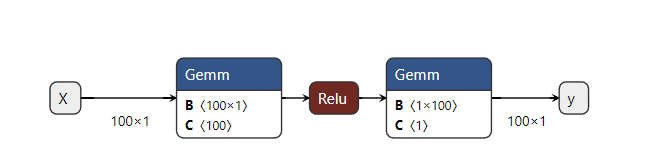

- [ ] Проверено на семинаре

In [ ]:
import torch as th
X = th.linspace(0, 1, 100).view(-1, 1)
y = th.sin(2 * th.pi * X) + 0.1 * th.rand(X.size())

<p class="task" id="3"></p>

3\. Исследуйте, как добавление дропаута влияет на процесс обучения модели. Решите задачу регрессии несколько раз, изменяя значения вероятности дропаута $p$ от 0 до 0.8. В качестве модели рассмотрите нейронную сеть с одним скрытым слоем.

Визуализируйте график изменения значений $R^2$ в зависимости от вероятности дропаута $p$ на обучающей и тестовой выборке. Визуализируйте на отдельном графике зависимости разности между $R^2$ на обучающей выборки и $R^2$ на тестовой выборке.

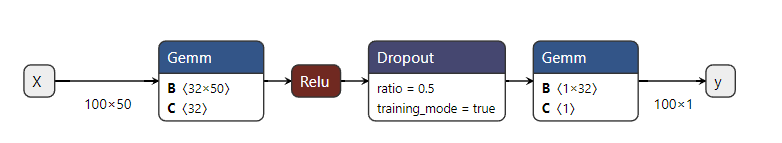

- [ ] Проверено на семинаре

In [ ]:
from sklearn.datasets import make_regression
import torch as th

th.manual_seed(42)
X, y, coef = make_regression(
    n_samples=100,
    n_features=50,
    n_informative=20,
    noise=2,
    coef=True,
    random_state=42,

)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

<p class="task" id="4"></p>

4\. Решите задачу регрессии с и без использования пакетной нормализации. Покажите, как меняется результат обучения моделей при различных значениях скорости обучения (0.001, 0.01, 0.1) за одно и то же количество эпох.

Визуализируйте график изменения значений $R^2$ в зависимости от эпохи при различных значениях скорости обучения с- и без использования пакетной нормализации.

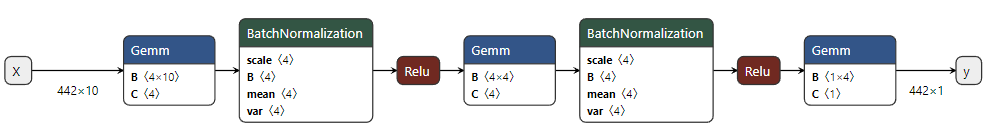

- [ ] Проверено на семинаре

In [ ]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)
y = (y - y.mean())/y.std()

<p class="task" id="5"></p>

5\. Решите задачу регрессии c использованием различных алгоритмов градиентного спуска. Покажите, как меняется результат обучения моделей при использовании различных алгоритмов (Adam, Adagrad, RMSProp, SGD) за одно и то же количество эпох с одной и той же скоростью обучения. Используйте модель с архитектурой, аналогичной модели из предыдущей задачи.

Визуализируйте график изменения значений MAPE в зависимости от эпохи при использовании различных алгоритмов градиентного спуска.

- [ ] Проверено на семинаре

In [ ]:
def load_boston():
    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    return data, target

In [ ]:
X, y = load_boston()
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)